In [1]:
import synthx as sx

### sensitivity check

In [2]:
df = sx.sample(
    n_units=200,
    n_time=50,
    n_observed_covariates=2,
    n_unobserved_covariates=1,
    intervention_units=[1, 2, 3],
    intervention_time=40,
    intervention_effect=1,
    noise_effect=0.1,
    scale=2,
    seed=42,
)

In [3]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns=['covariate_1', 'covariate_2'],
    intervention_units=[1, 2, 3],
    intervention_time=40,
)

In [4]:
effects_test, effects_placebo, sc_test, scs_placebo = sx.placebo_test(dataset)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197/197 [00:10<00:00, 18.50it/s]


In [5]:
sx.stats.calc_p_value(effects_test, effects_placebo)

0.024332328861074715

uplift: 1.0125, p value: 0.955481118172744.
2it [00:17,  4.33s/it, uplift=1.0125]

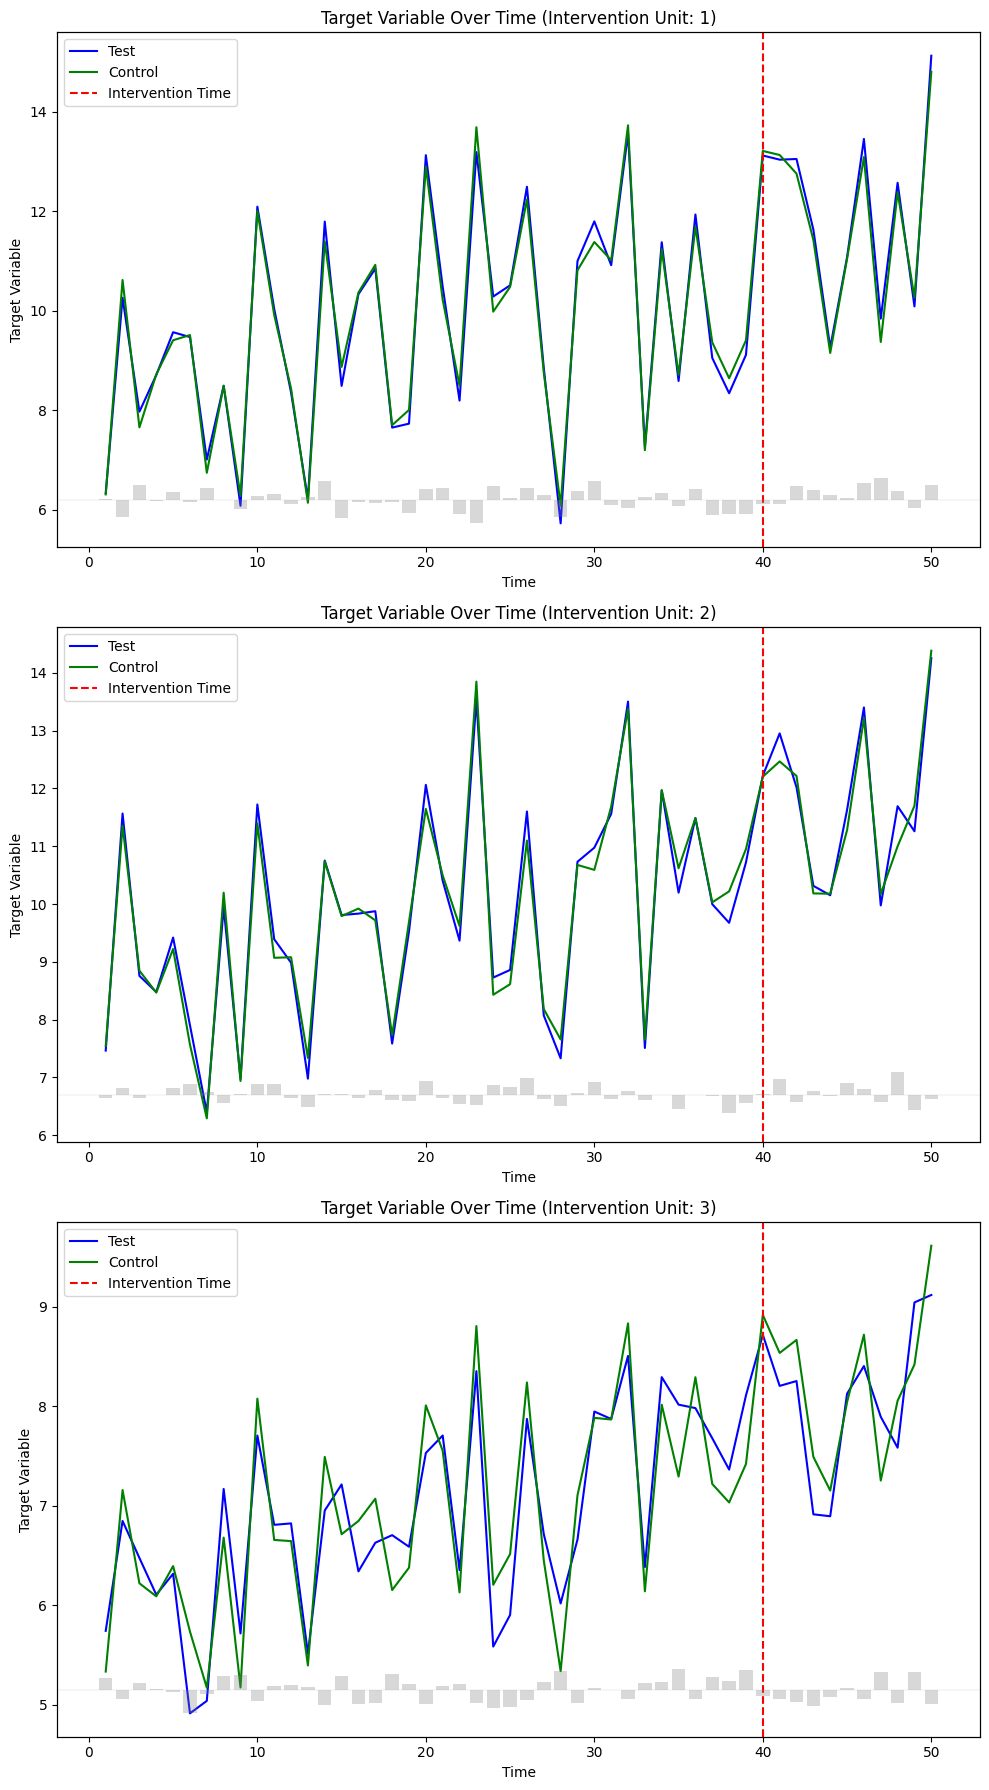

uplift: 1.0187, p value: 0.2127664071905031.
3it [00:26,  6.35s/it, uplift=1.0187]

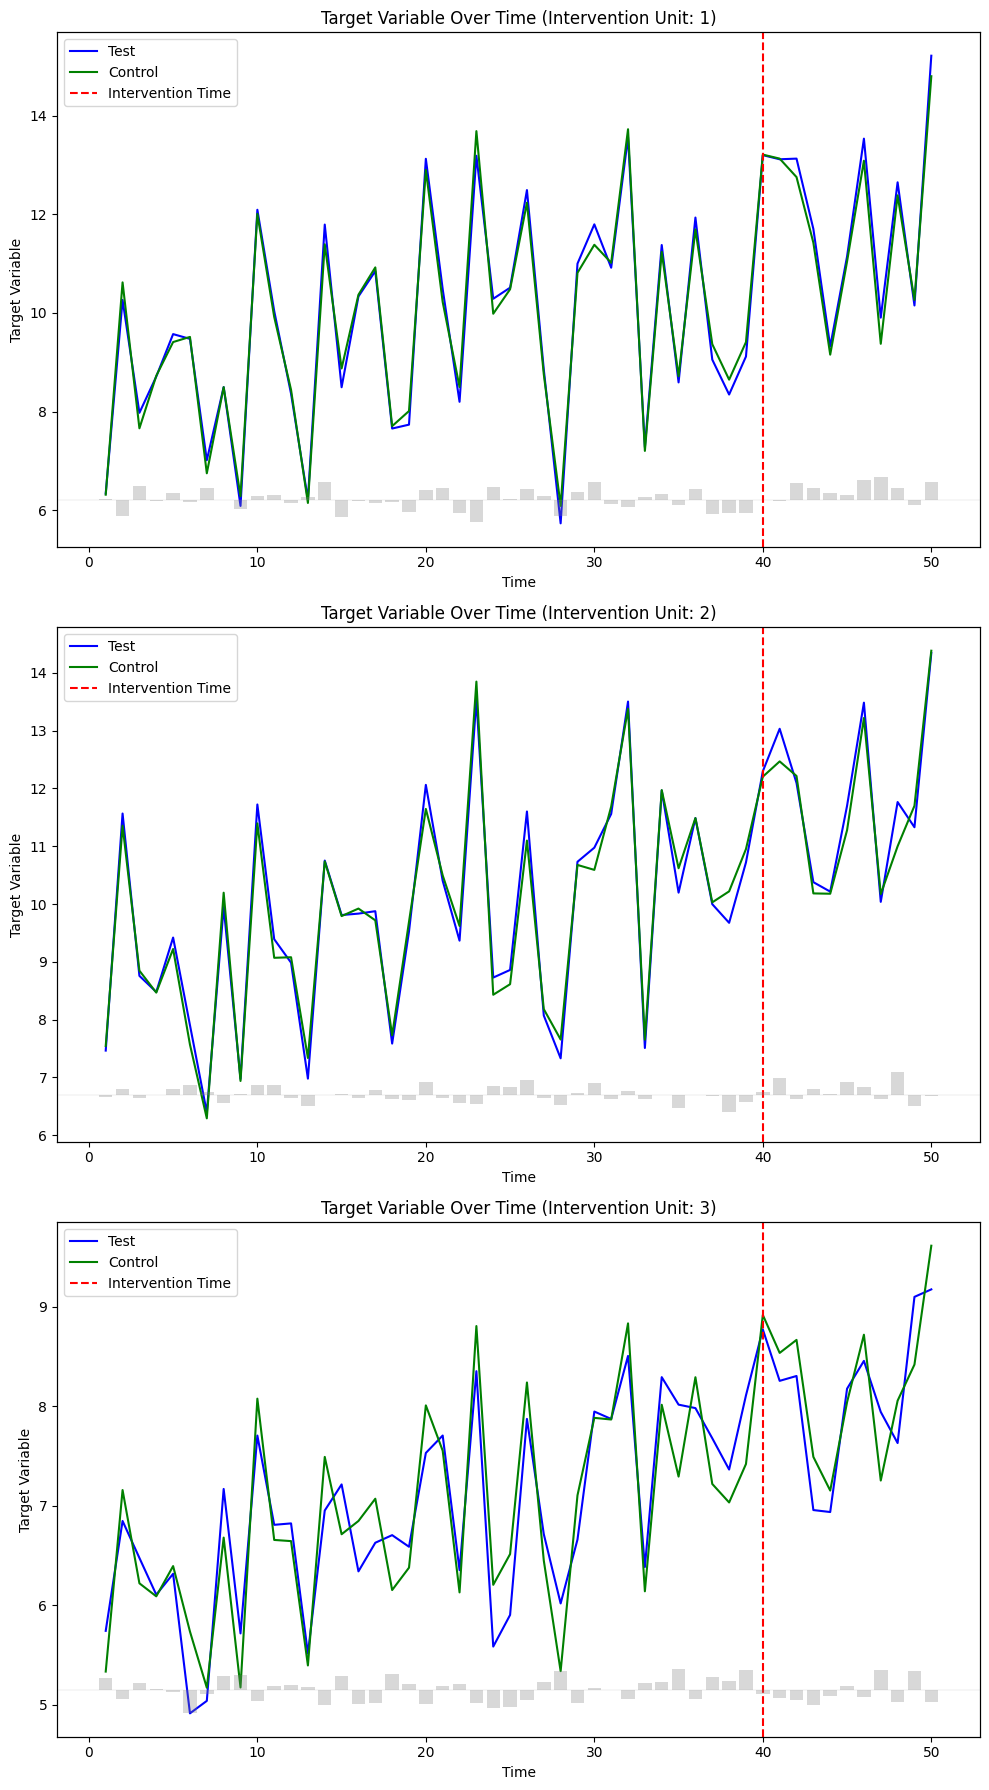

uplift: 1.0219, p value: 0.05856008680520195.
4it [00:36,  7.42s/it, uplift=1.0219]

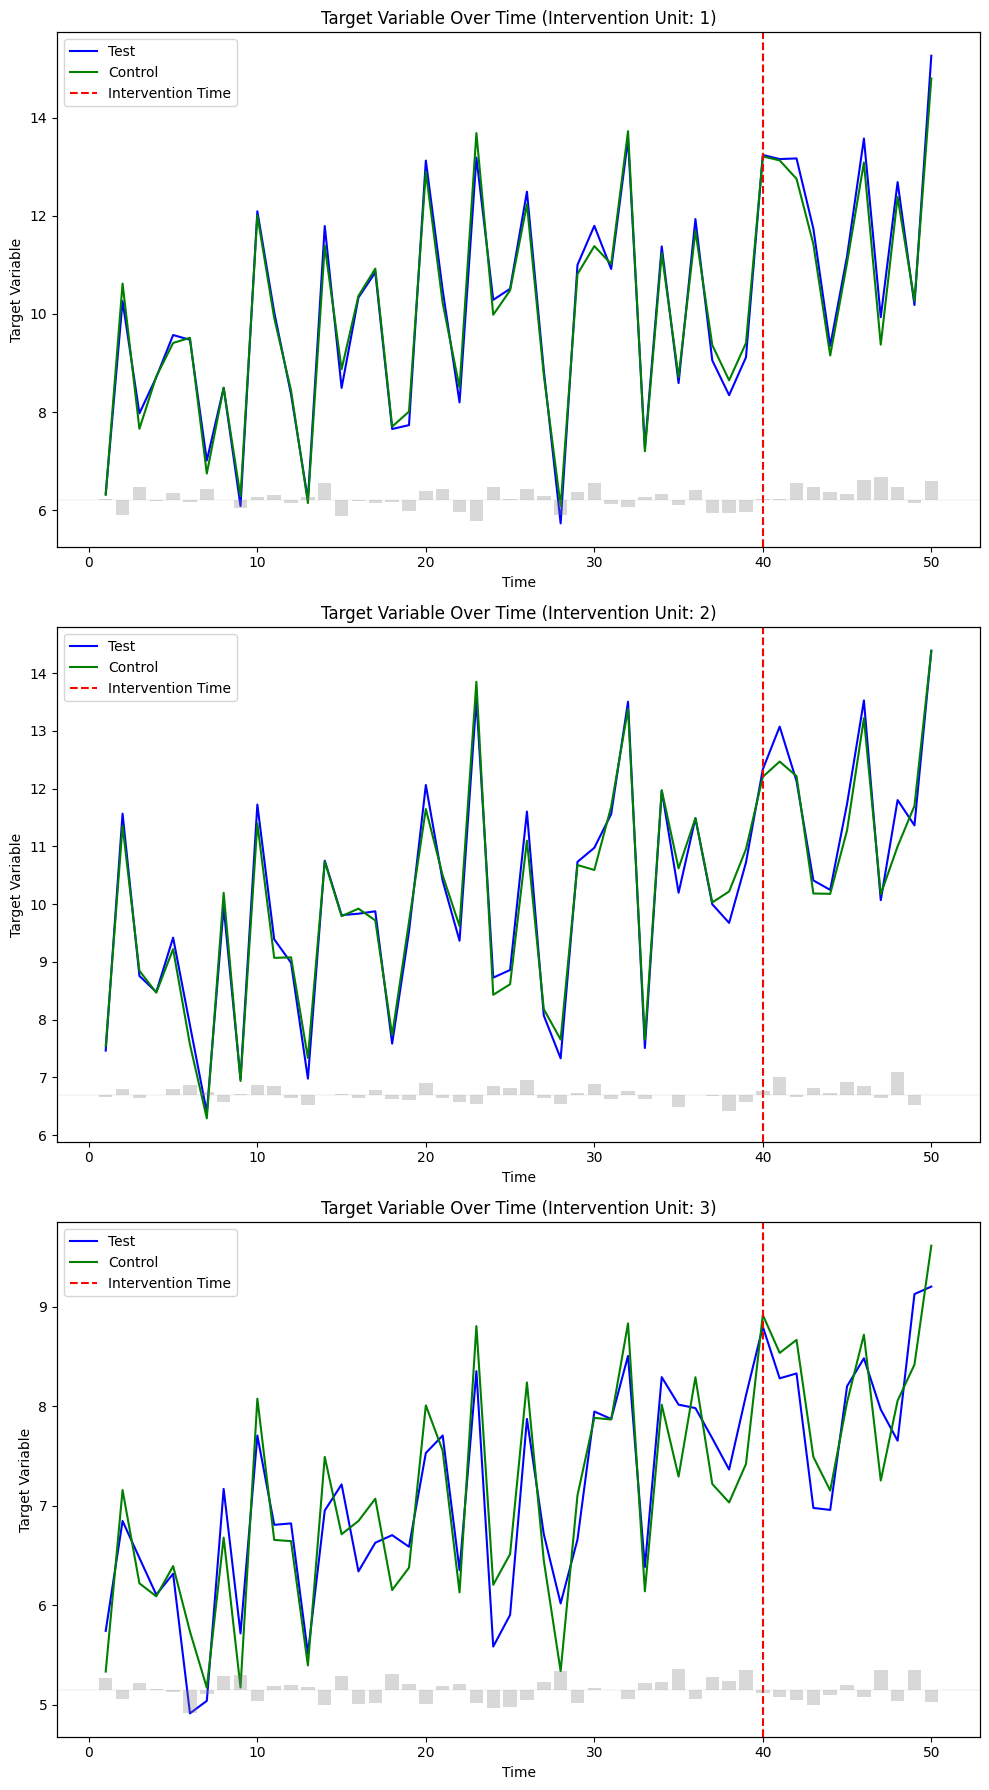

uplift: 1.0227, p value: 0.04017448156717635.
6it [00:53,  8.31s/it, uplift=1.0227]

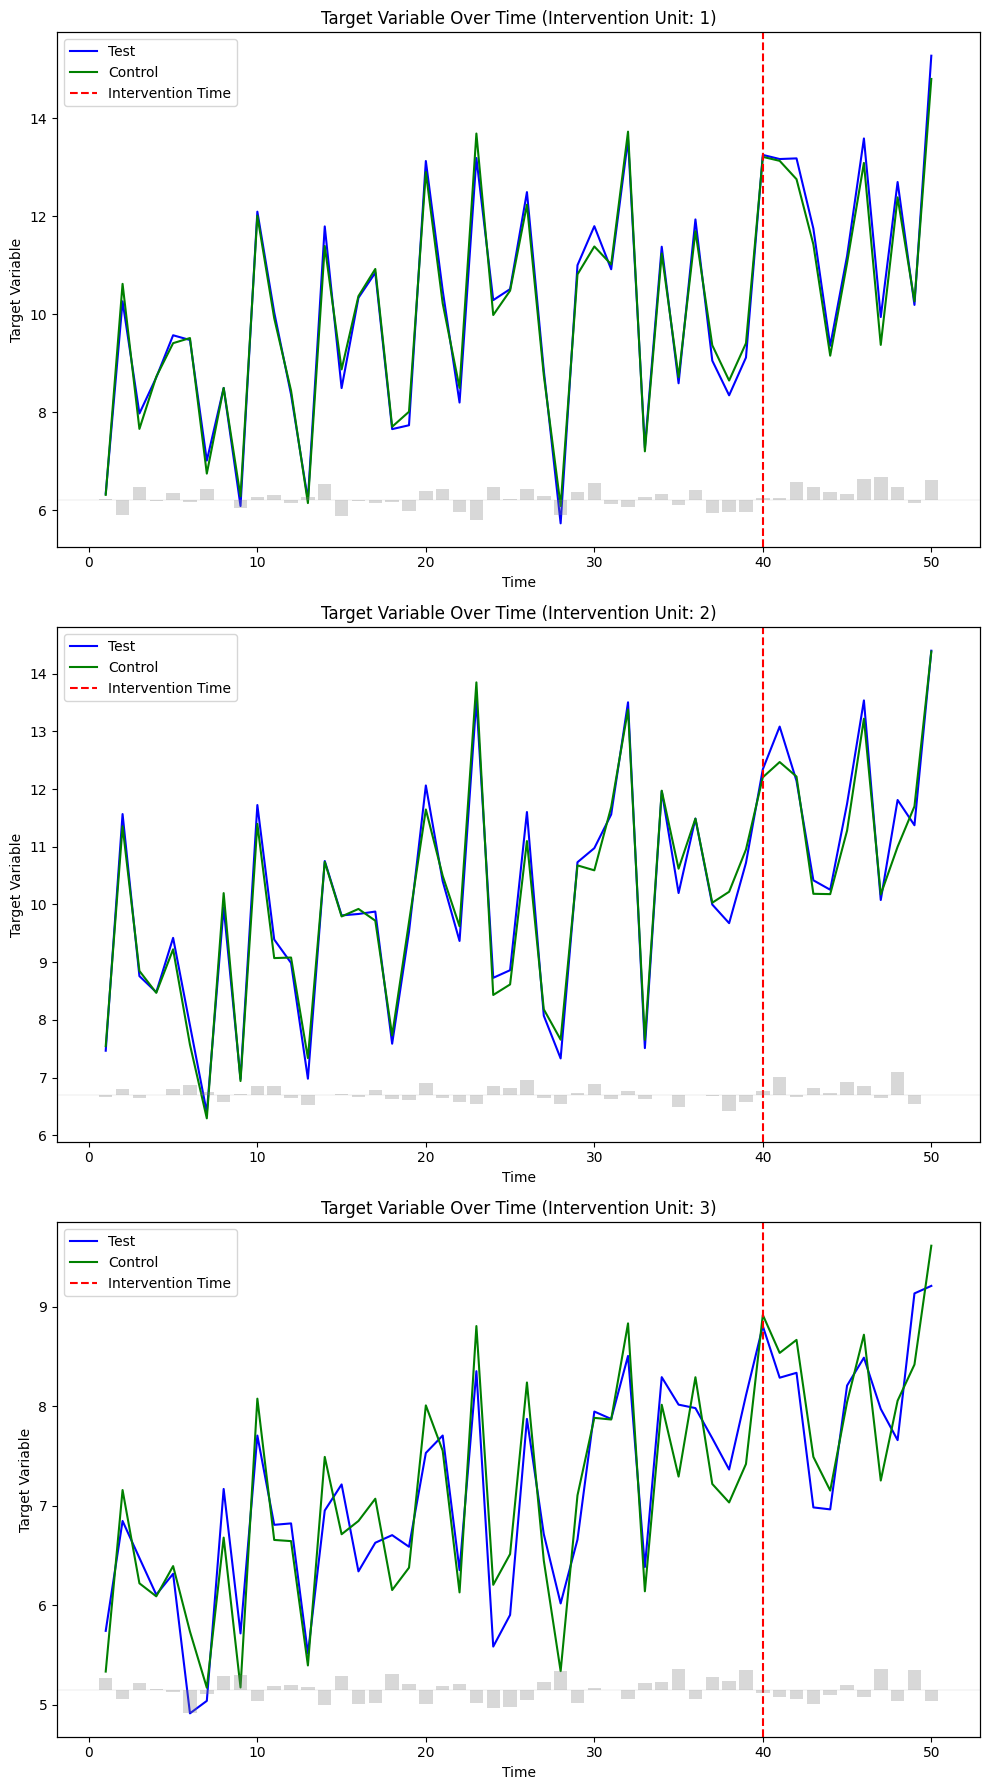

6it [00:54,  9.04s/it, uplift=1.0227]


1.0234375

In [6]:
sx.placebo_sensitivity_check(dataset, effects_placebo, r=1.05, sparsity_lambda=0.01, write_progress=True)

uplift: 1.0250, p value: 0.24304752536731336.
1it [00:08,  8.50s/it, uplift=1.0250]

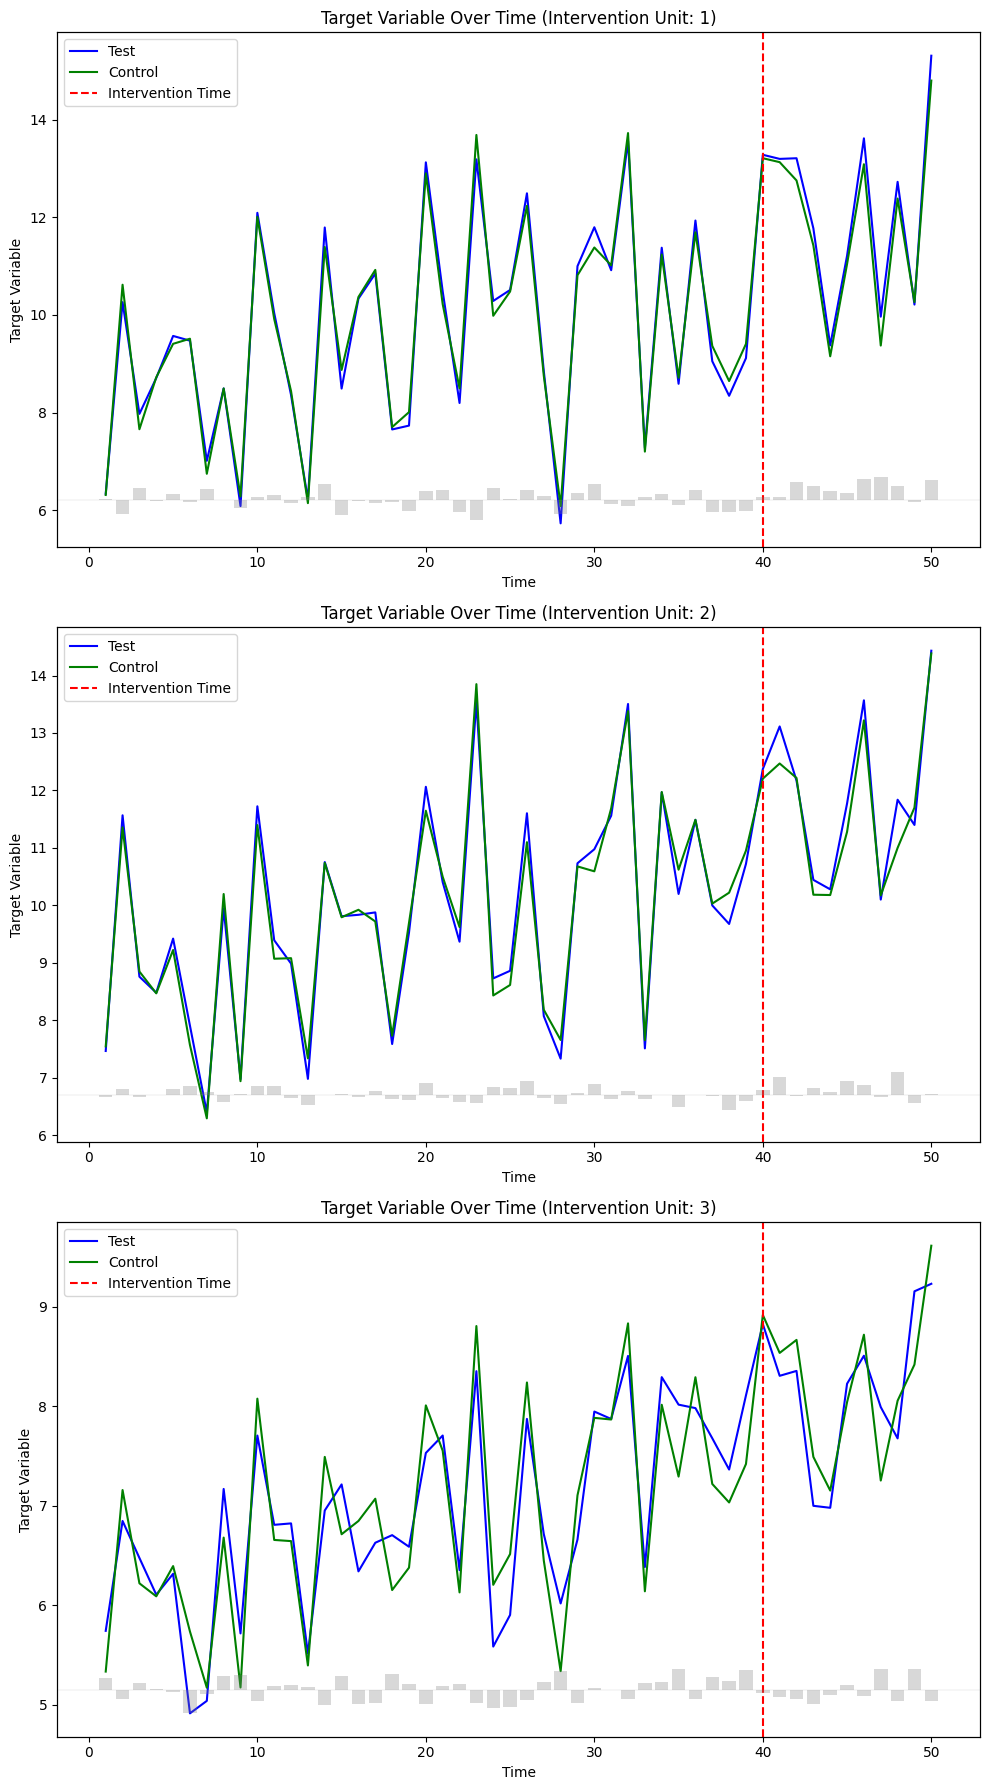

uplift: 1.0375, p value: 0.24860954260683168.
2it [00:17,  4.46s/it, uplift=1.0375]

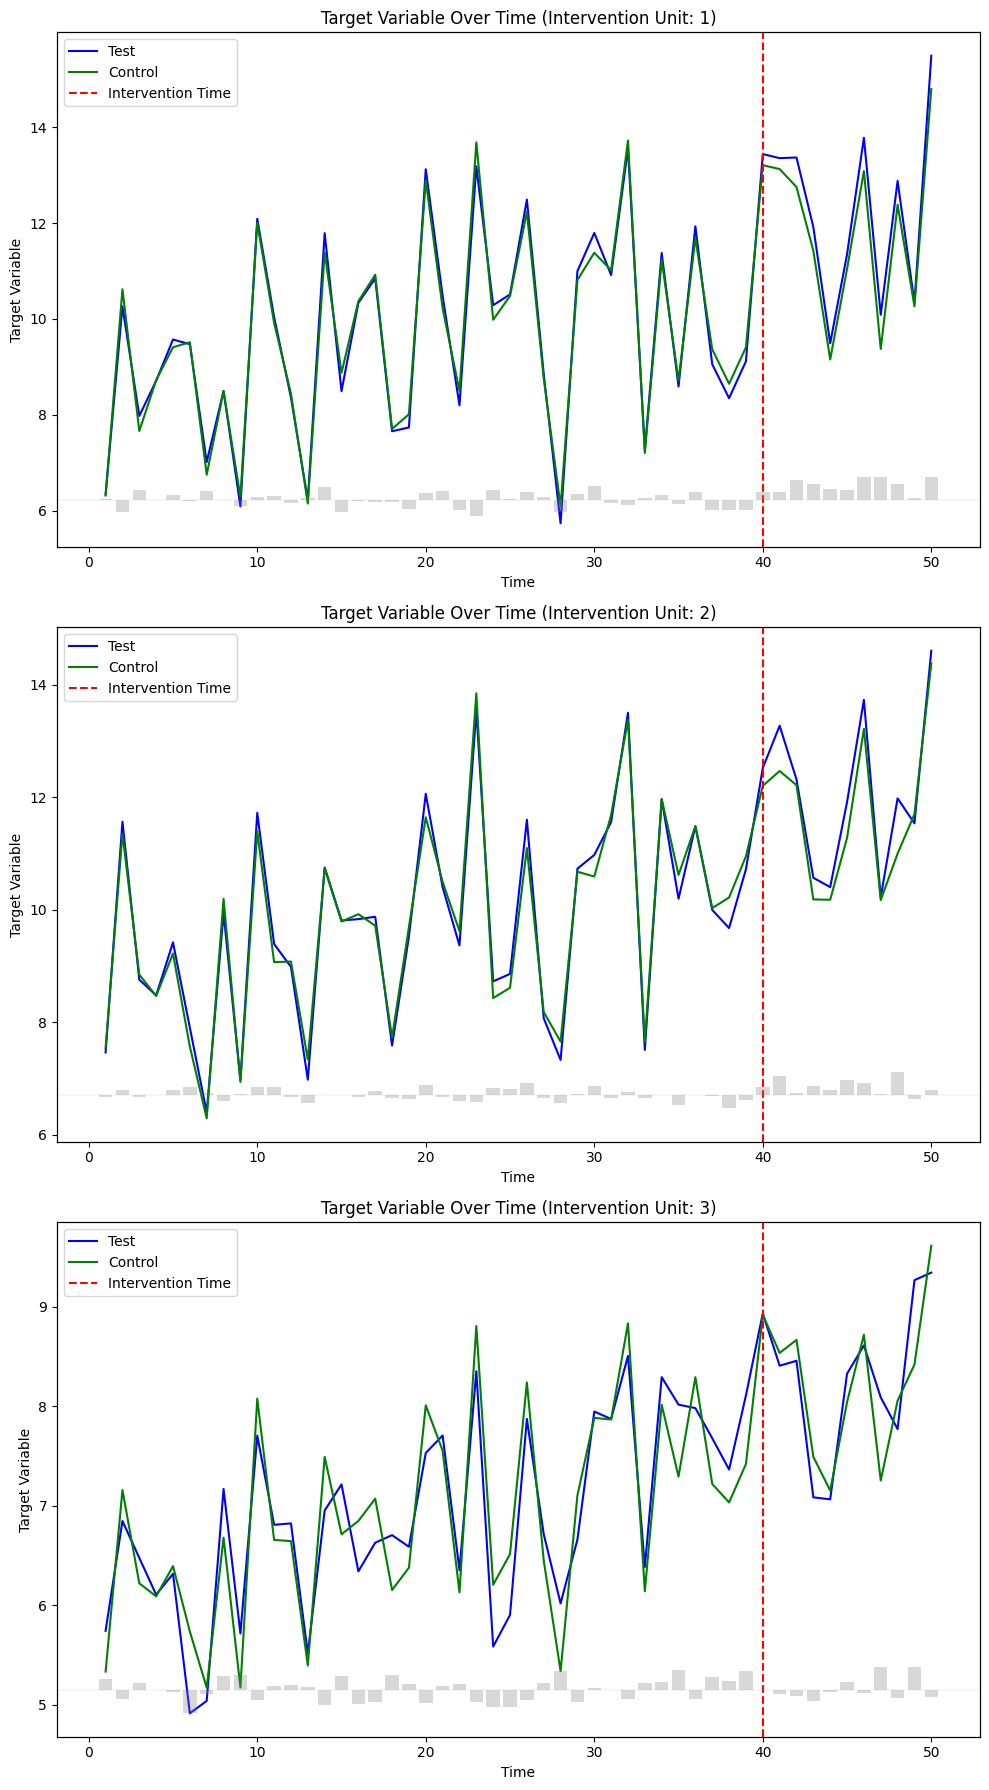

uplift: 1.0438, p value: 0.1631667883078469.
3it [00:26,  6.38s/it, uplift=1.0438]

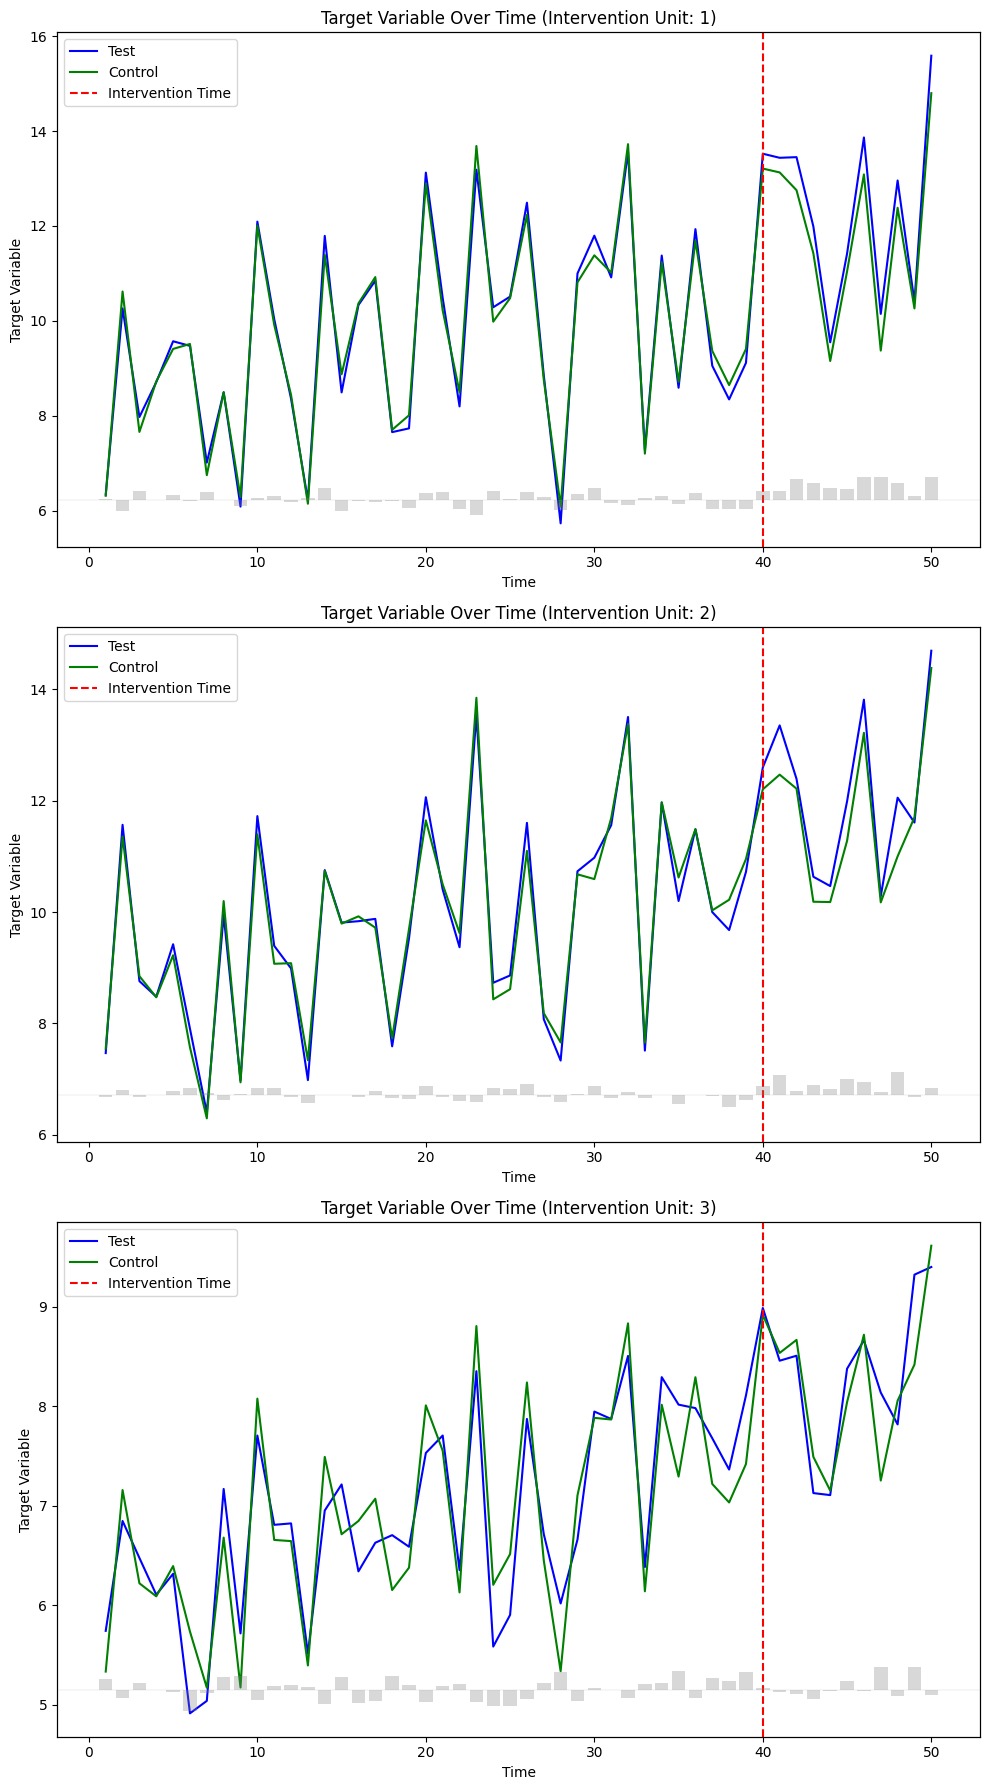

uplift: 1.0469, p value: 0.12850088541767796.
4it [00:35,  7.32s/it, uplift=1.0469]

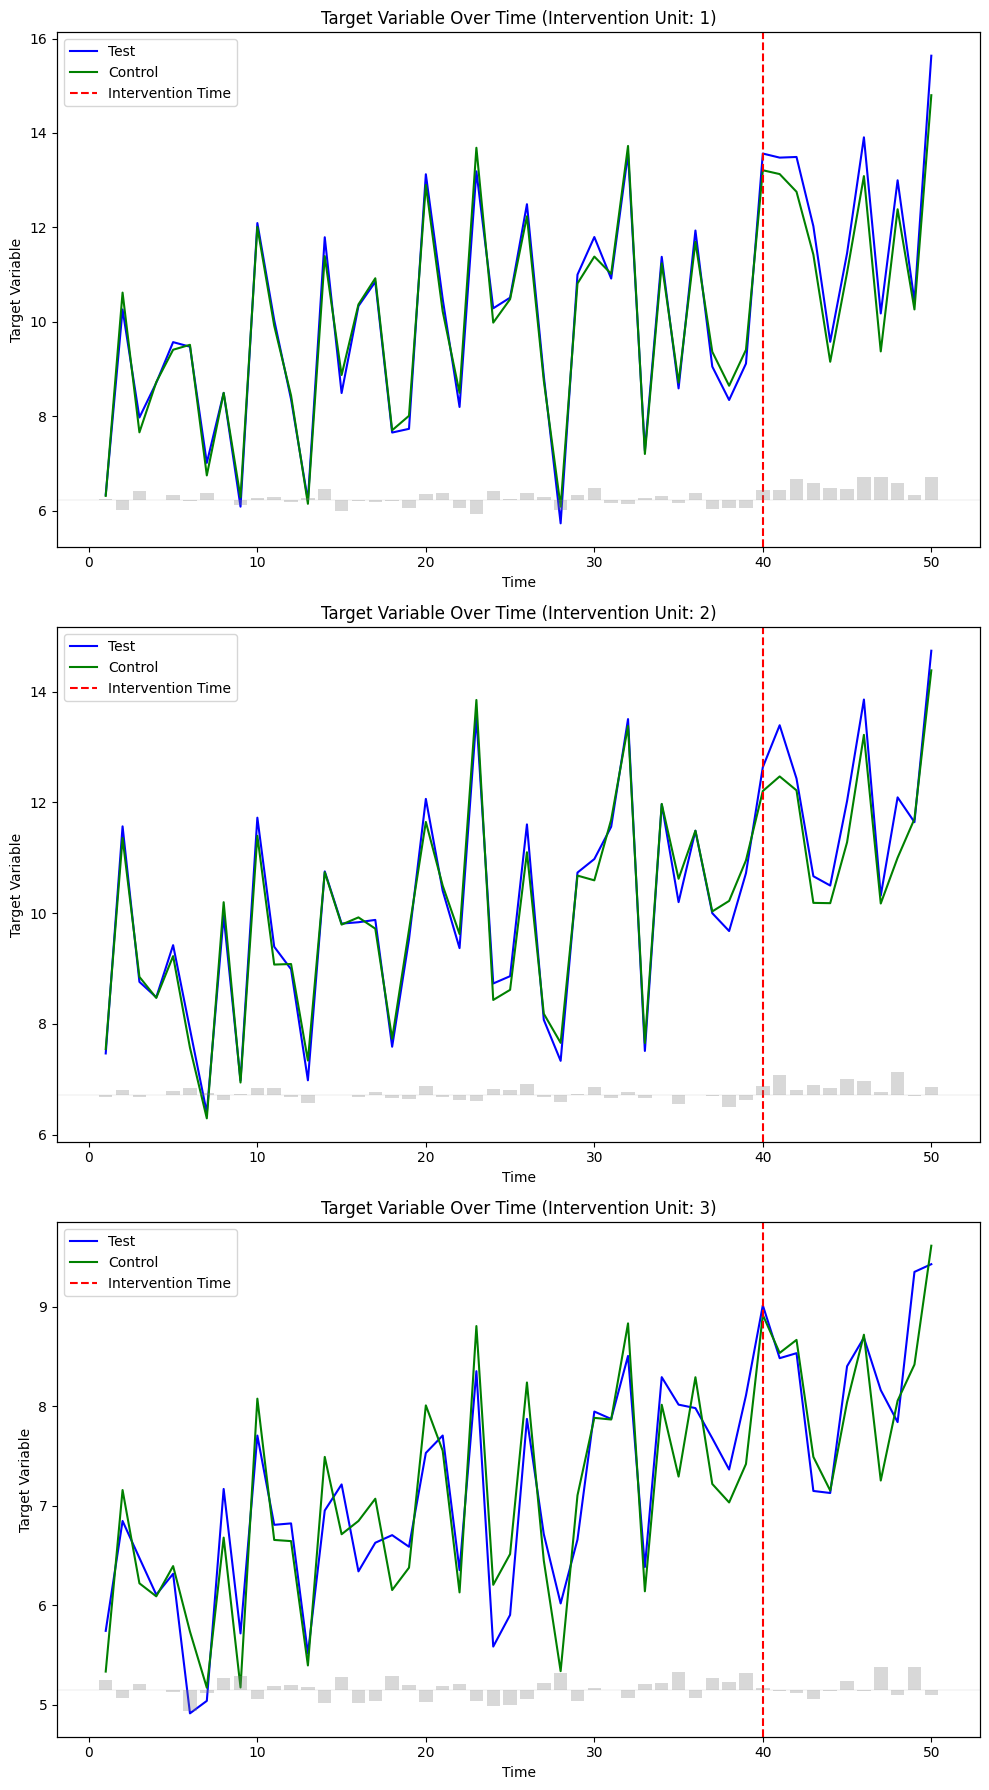

uplift: 1.0484, p value: 0.11331102698664575.
5it [00:45,  8.03s/it, uplift=1.0484]

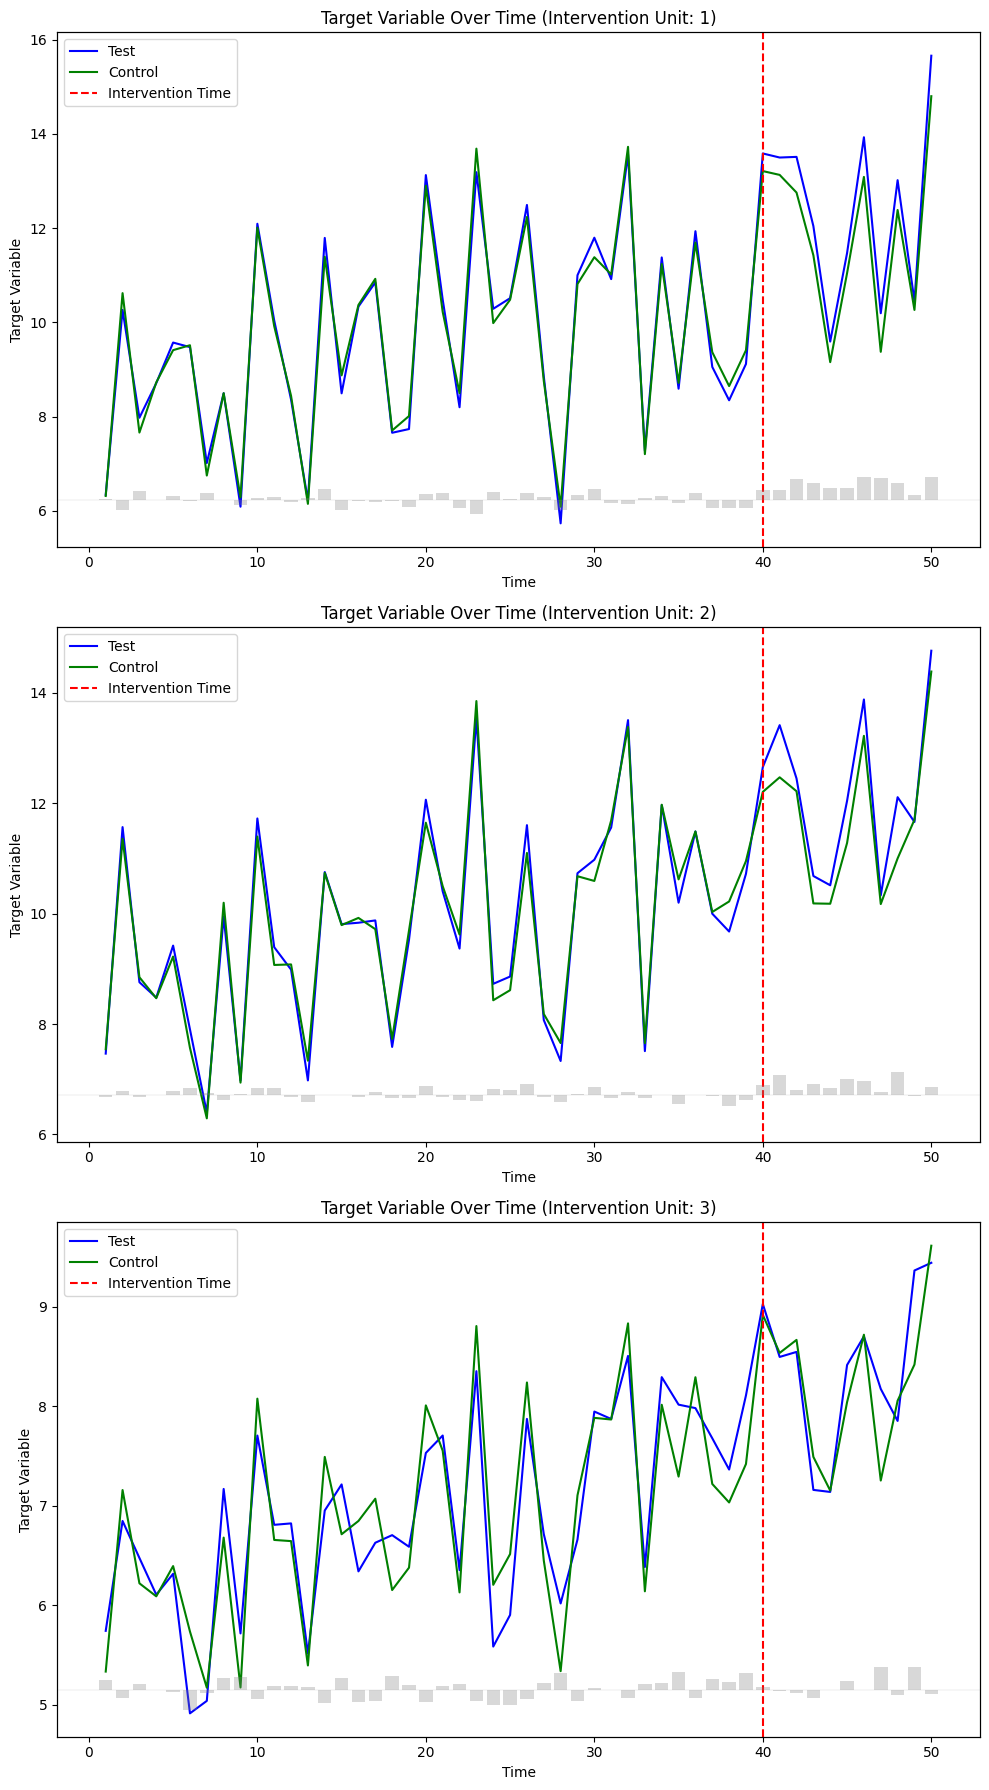

uplift: 1.0492, p value: 0.1062451674153153.
6it [00:54,  8.46s/it, uplift=1.0492]

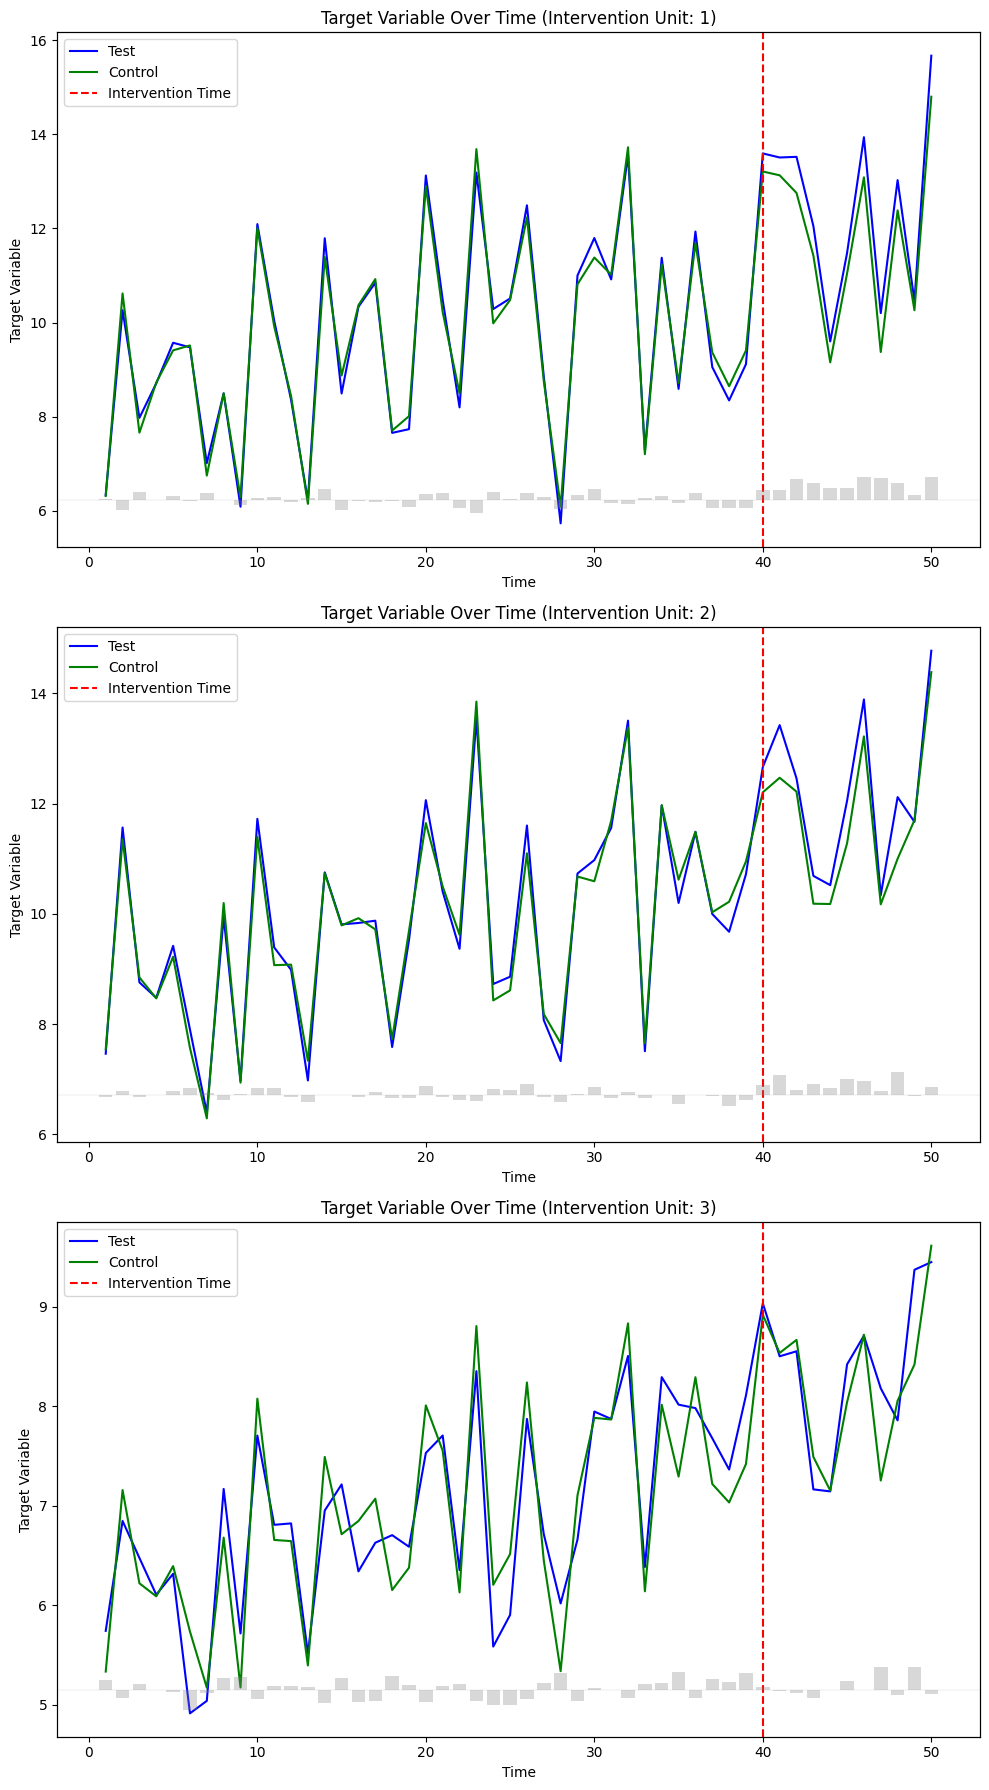

6it [00:54,  9.12s/it, uplift=1.0492]


1.05

In [7]:
sx.ttest_sensitivity_check(dataset, r=1.05, sparsity_lambda=0.01, write_progress=True)

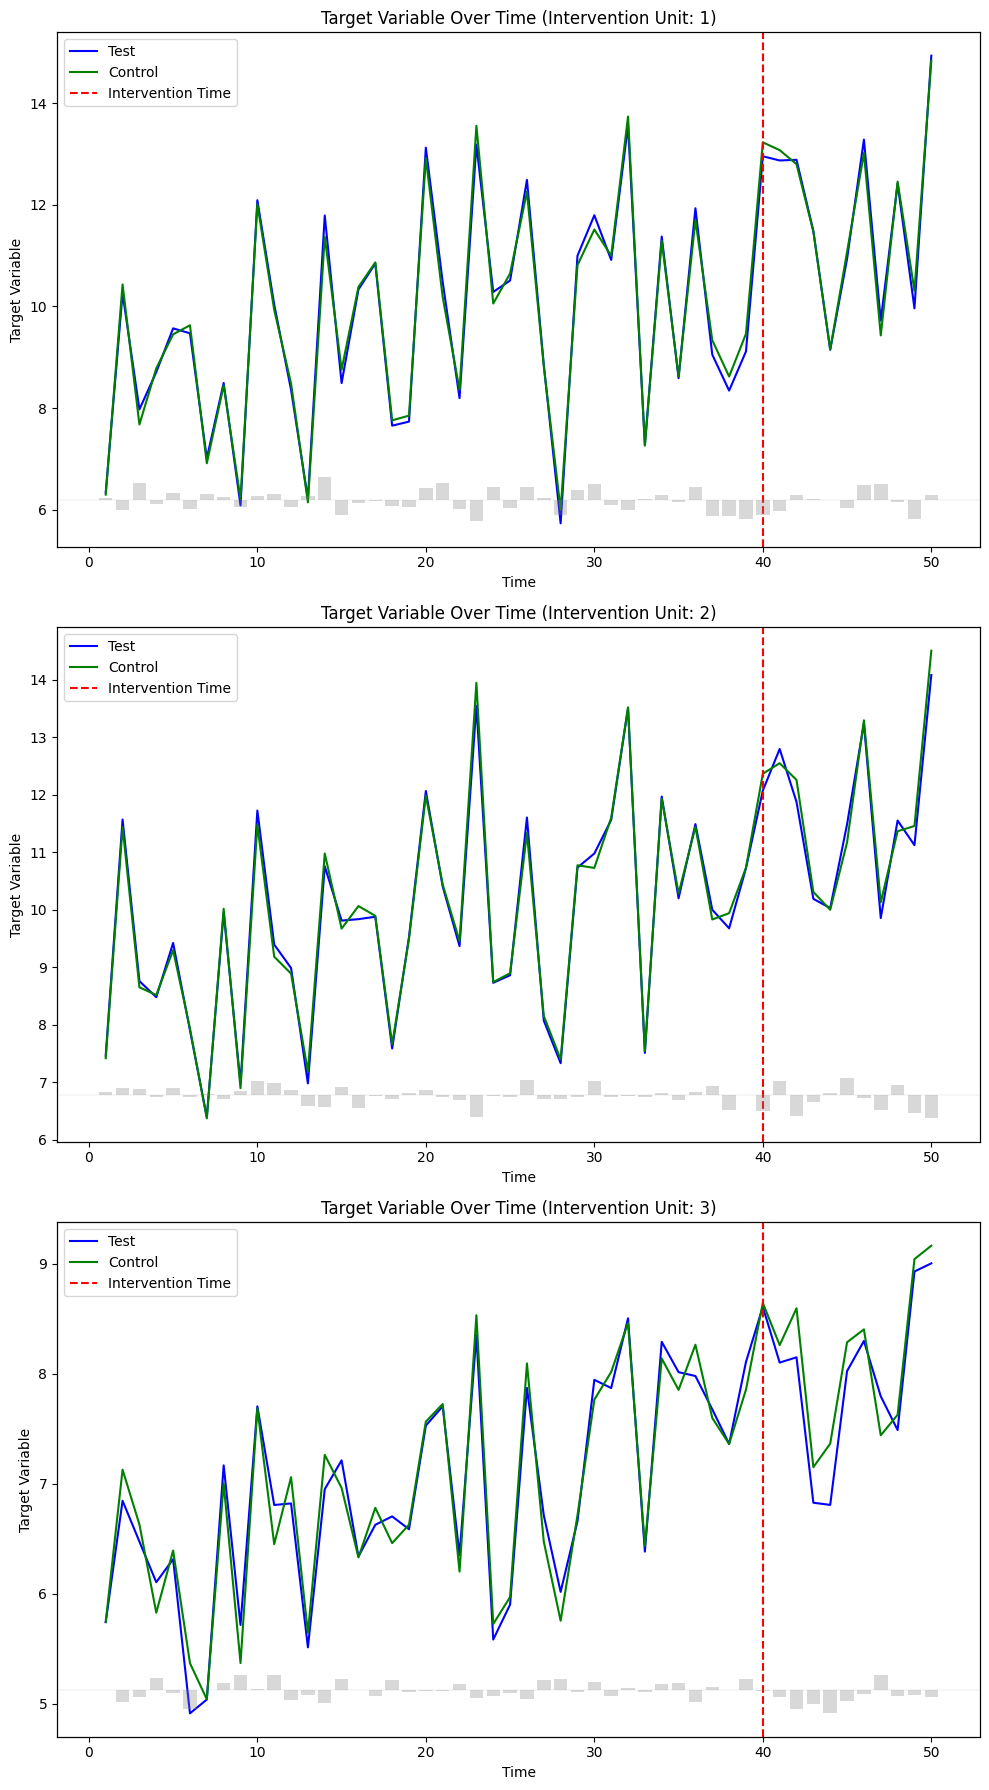

In [8]:
sc_test.plot()